In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
# Create the model, 3 layer, ReLU activation
model = keras.Sequential([
    # Reshape the input to add a channel dimension
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten and add dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])




c:\Code\.venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
# Load in the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to 0-1 range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28)
Test labels shape: (10000, 10)


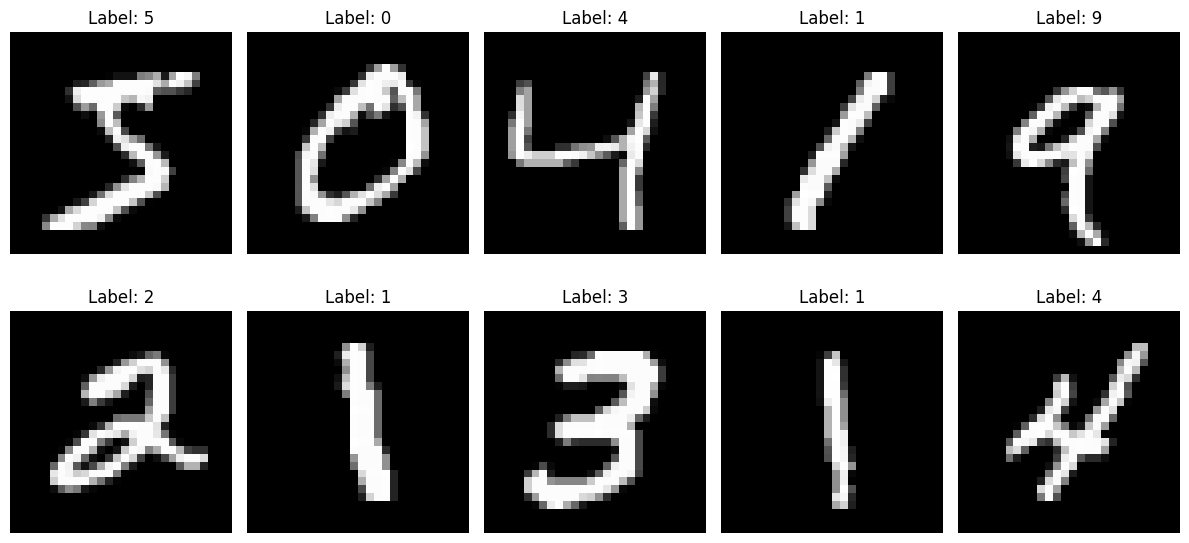

In [4]:
# samples of the data
num_samples = 10
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {np.argmax(y_train[i])}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# print("Model architecture:")
# model.summary()

print("\nTraining model...")
# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)


Training model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8669 - loss: 0.4310 - val_accuracy: 0.9782 - val_loss: 0.0689
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9622 - loss: 0.1324 - val_accuracy: 0.9856 - val_loss: 0.0449
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9729 - loss: 0.0939 - val_accuracy: 0.9875 - val_loss: 0.0388
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9784 - loss: 0.0759 - val_accuracy: 0.9884 - val_loss: 0.0341
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9823 - loss: 0.0604 - val_accuracy: 0.9899 - val_loss: 0.0311
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9852 - loss: 0.0512 - val_accuracy: 0.9919 - val_loss: 0.0256
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9873 - loss: 0.0445 - val_accuracy: 0.9906 - val_loss: 0.0349
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9884 - loss

Test accuracy: 0.9919
Test loss: 0.0283

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



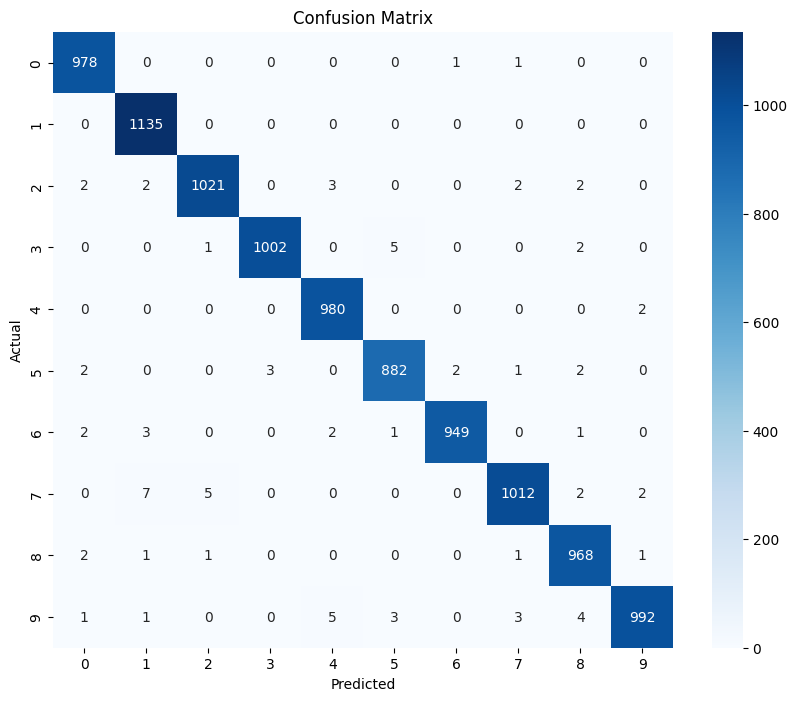

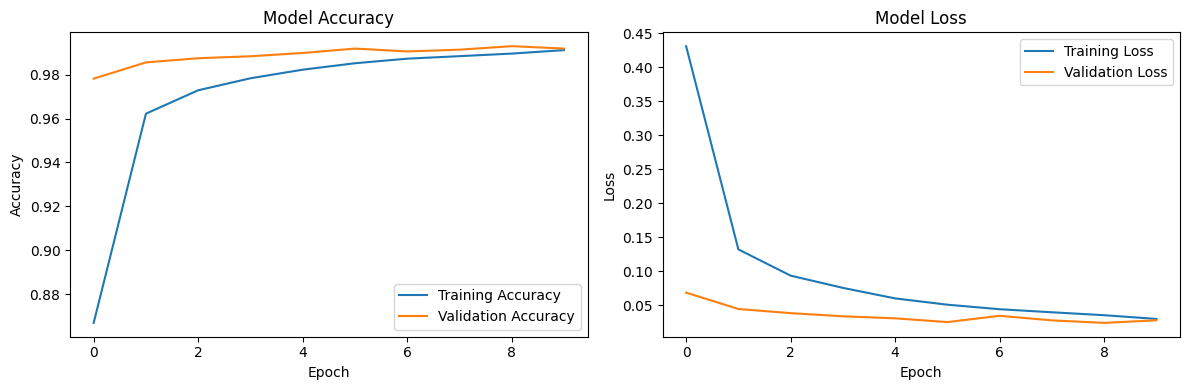

In [6]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Make predictions
y_pred = model.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

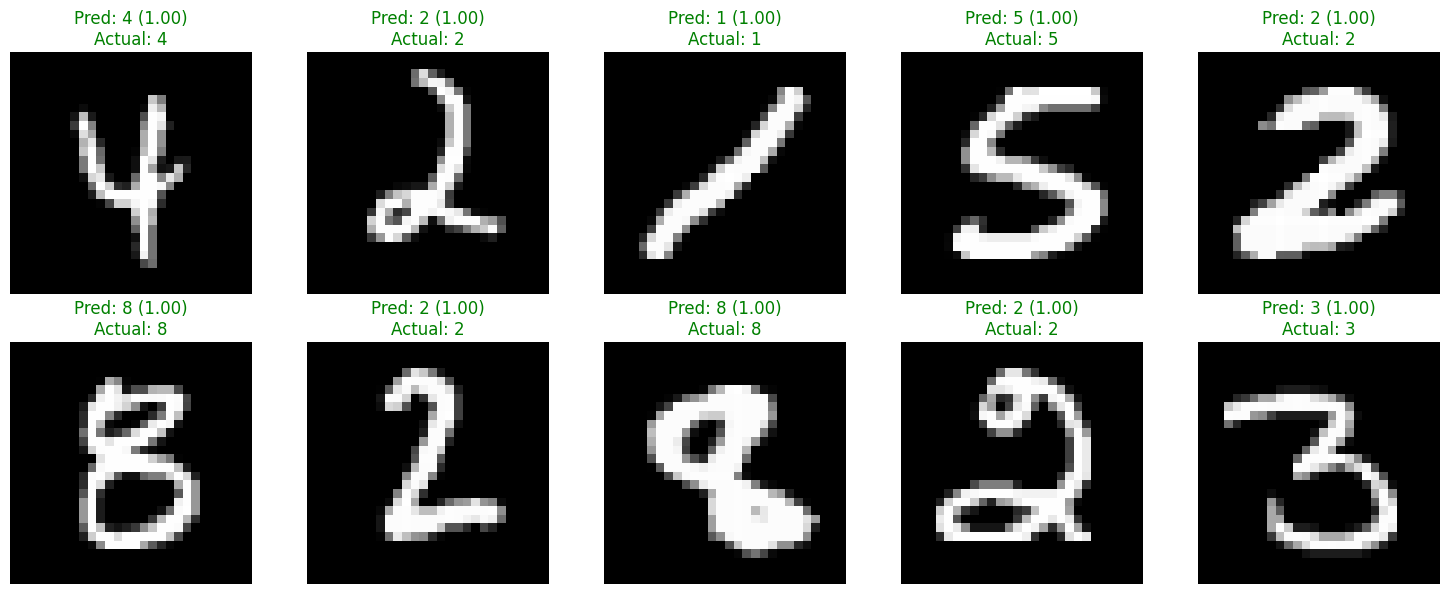

In [7]:
# Get random sample indices
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    
    # Make prediction
    pred = model.predict(x_test[idx:idx+1], verbose=0)
    predicted_class = np.argmax(pred)
    confidence = np.max(pred)
    actual_class = np.argmax(y_test[idx])
    
    # Plot image
    plt.imshow(x_test[idx], cmap='gray')
    color = 'green' if predicted_class == actual_class else 'red'
    plt.title(f'Pred: {predicted_class} ({confidence:.2f})\nActual: {actual_class}', 
                color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

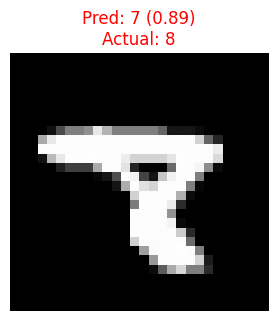

In [8]:
# Get random sample indices and specifically show incorrect ones
num_samples = 100
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 6))
plot_idx = 0  # Counter for subplot position
for idx in indices:
    # Make prediction
    pred = model.predict(x_test[idx:idx+1], verbose=0)
    predicted_class = np.argmax(pred)
    confidence = np.max(pred)
    actual_class = np.argmax(y_test[idx])

    if predicted_class == actual_class:
        continue  # Skip correct predictions

    plt.subplot(2, 5, plot_idx + 1)
    plt.imshow(x_test[idx], cmap='gray')
    color = 'green' if predicted_class == actual_class else 'red'
    plt.title(f'Pred: {predicted_class} ({confidence:.2f})\nActual: {actual_class}', color=color)
    plt.axis('off')
    plot_idx += 1
    if plot_idx >= 10:  # Stop after filling 10 subplots
        break

plt.tight_layout()
plt.show()

In [9]:
model.save('mnist_digit_model.keras')